# Setup

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Linear regression using the Normal Equation

계산으로 적당한 theta 값 구하기 

In [9]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100,1)

Saving figure generated_data_plot


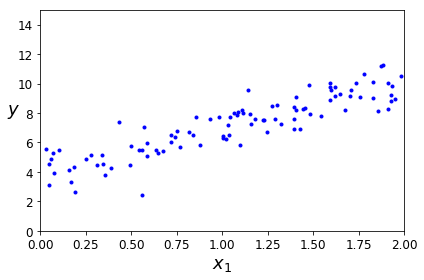

In [10]:
plt.plot(x, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [15]:
X_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
# np.linalg.inv 역행렬 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b[:3]
theta_best

array([[ 1.        ,  1.58962261],
       [ 1.        ,  1.00527419],
       [ 1.        ,  1.15380777]])

array([[ 3.86501051],
       [ 3.13916179]])

In [16]:
# 새로운 값으로 예측하기 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.86501051],
       [ 10.14333409]])

[0, 2, 0, 15]

Saving figure linear_model_predictions


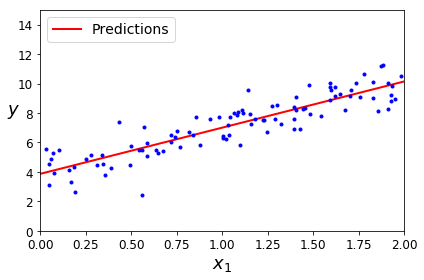

In [20]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

In [22]:
# LinearRegression 모듈을 이용하여 구하기 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(array([ 3.86501051]), array([[ 3.13916179]]))

In [23]:
lin_reg.predict(X_new)

array([[  3.86501051],
       [ 10.14333409]])

# Linear regression using batch gradient descent

* Gradient Descent : 최적화 알고리즘, cost funting 을 minimize 하도록 반복해서 파라미터를 변경 해줌

    Learning rate 조절 중요

    MSE cost funtion 은 convex funtion 이여서 gobal min 이 하나 이다. 

    features 가 다른 scale 을 갖을 수록 training 에 수렵하는데 오래 걸릴 수 있다. 
    more parameter, more demension 까다롭다. 


* partical derivative : 

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients